In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')


In [3]:
train = pd.read_csv('C:/Users/mughe/Desktop/Dataset/Ntwork traffic Prediction/Traffic.csv')
train 

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [4]:
train, test = train_test_split(train,test_size=0.1,random_state=1992)
print("Shape of train: ",train.shape)
print("Shape of test",test.shape)

Shape of train:  (2678, 9)
Shape of test (298, 9)


In [5]:
train.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [6]:
print('train')
display(train.info())
print('test')
display(test.info())

train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 828 to 2313
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2678 non-null   object
 1   Date               2678 non-null   int64 
 2   Day of the week    2678 non-null   object
 3   CarCount           2678 non-null   int64 
 4   BikeCount          2678 non-null   int64 
 5   BusCount           2678 non-null   int64 
 6   TruckCount         2678 non-null   int64 
 7   Total              2678 non-null   int64 
 8   Traffic Situation  2678 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.2+ KB


None

test
<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 1338 to 896
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               298 non-null    object
 1   Date               298 non-null    int64 
 2   Day of the week    298 non-null    object
 3   CarCount           298 non-null    int64 
 4   BikeCount          298 non-null    int64 
 5   BusCount           298 non-null    int64 
 6   TruckCount         298 non-null    int64 
 7   Total              298 non-null    int64 
 8   Traffic Situation  298 non-null    object
dtypes: int64(6), object(3)
memory usage: 23.3+ KB


None

<AxesSubplot: xlabel='Time', ylabel='Count'>

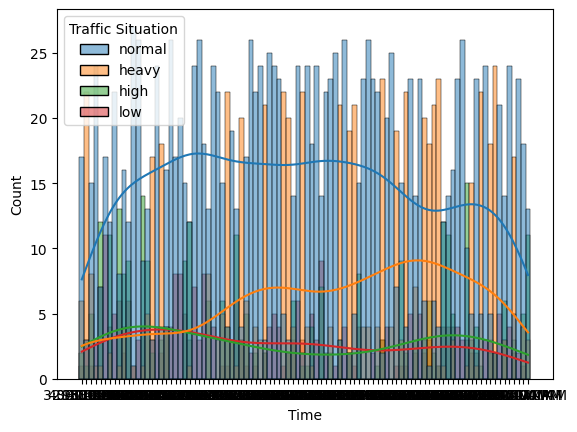

In [7]:
sns.histplot(train,x='Time',hue='Traffic Situation',kde=True)

<AxesSubplot: xlabel='Date', ylabel='Count'>

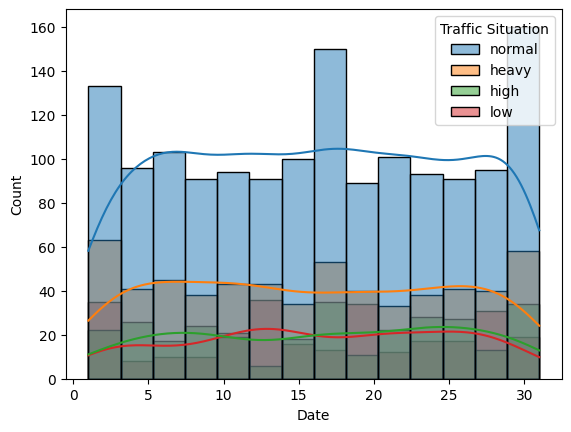

In [8]:
sns.histplot(train,x='Date',hue='Traffic Situation',kde=True)

<AxesSubplot: xlabel='Day of the week', ylabel='Count'>

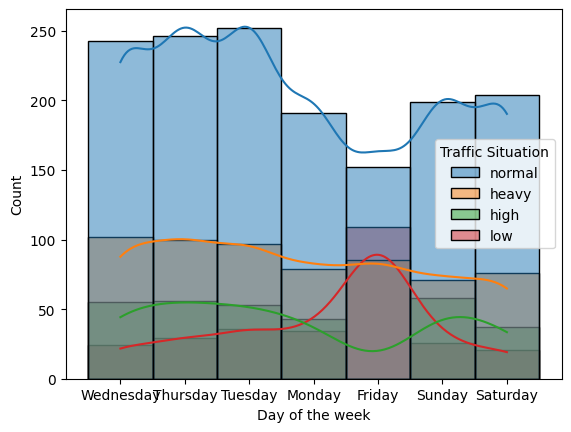

In [9]:
sns.histplot(train,x='Day of the week',hue='Traffic Situation',kde=True)

<AxesSubplot: xlabel='CarCount', ylabel='Count'>

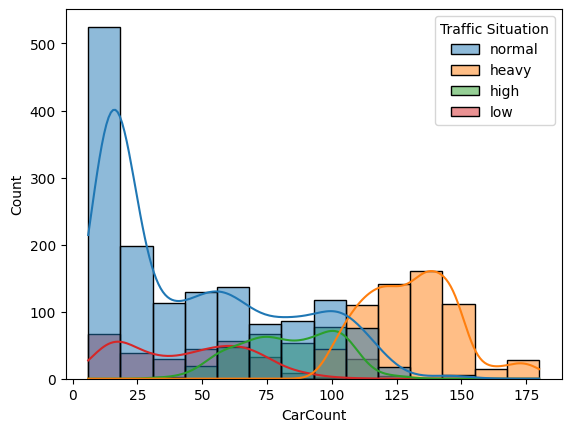

In [10]:
sns.histplot(train,x='CarCount',hue='Traffic Situation',kde=True)

<AxesSubplot: xlabel='BikeCount', ylabel='Count'>

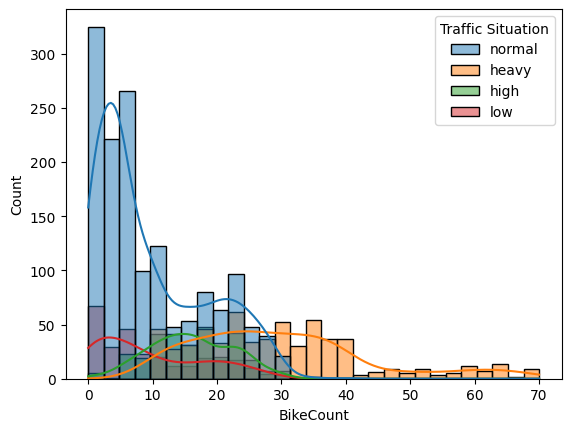

In [11]:
sns.histplot(train,x='BikeCount',hue='Traffic Situation',kde=True)

<AxesSubplot: xlabel='BusCount', ylabel='Count'>

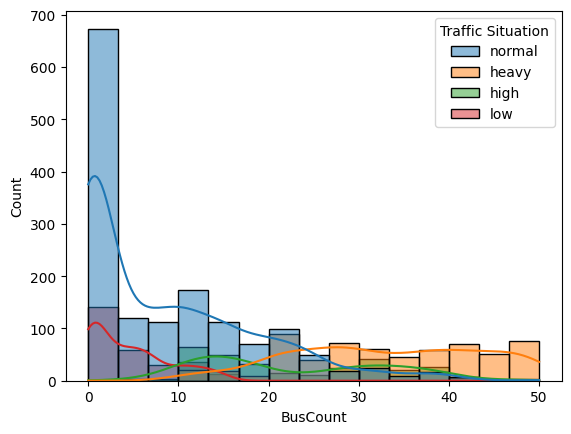

In [12]:
sns.histplot(train,x='BusCount',hue='Traffic Situation',kde=True)

<AxesSubplot: xlabel='TruckCount', ylabel='Count'>

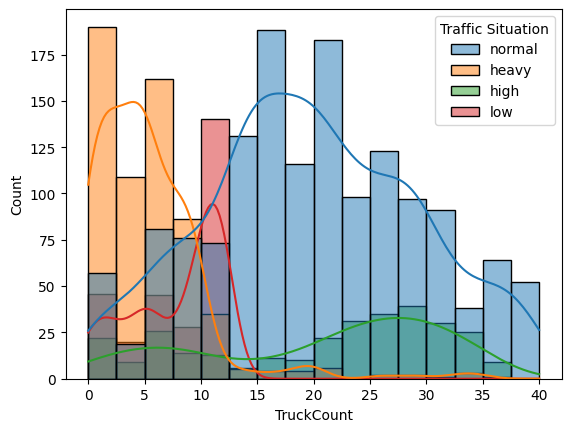

In [13]:
sns.histplot(train,x='TruckCount',hue='Traffic Situation',kde=True)

<AxesSubplot: xlabel='Total', ylabel='Count'>

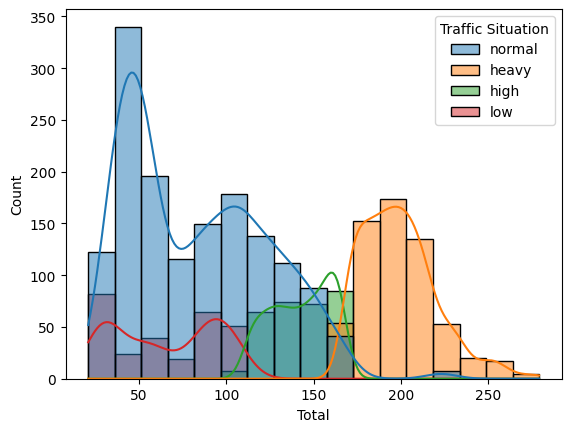

In [14]:
sns.histplot(train,x='Total',hue='Traffic Situation',kde=True)

## Preprocessing

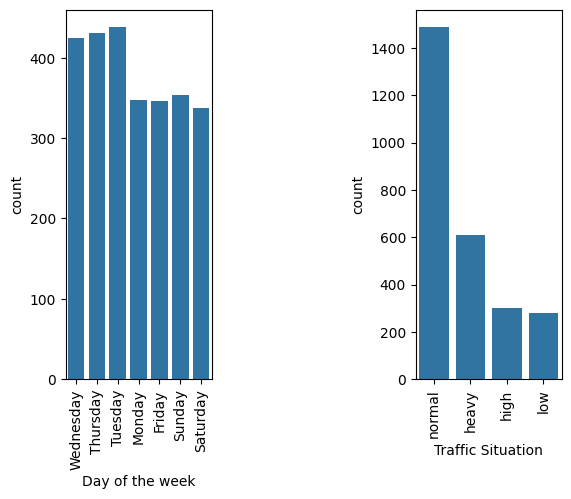

In [15]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Day of the week"])
plotter.xticks(rotation = 90);

plt.subplot(1, 3, 3)
sns.countplot(x = train["Traffic Situation"])
plotter.xticks(rotation = 90);
plt.show()

In [16]:
df_temp=train
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
train=df_temp
train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
828,3:00:00 PM,18,3,14,16,9,14,53,1
929,4:15:00 PM,19,4,104,31,37,6,178,3
2170,2:30:00 PM,1,3,91,22,34,8,155,2
2702,3:30:00 AM,7,2,18,2,1,27,48,1
2676,9:00:00 PM,6,1,105,14,13,32,164,2
...,...,...,...,...,...,...,...,...,...
1921,12:15:00 AM,30,1,19,2,0,22,43,1
229,9:15:00 AM,12,4,24,18,37,18,97,1
1835,2:45:00 AM,29,7,19,2,1,12,34,0
2216,2:00:00 AM,2,4,12,3,0,39,54,1


Feature Selection

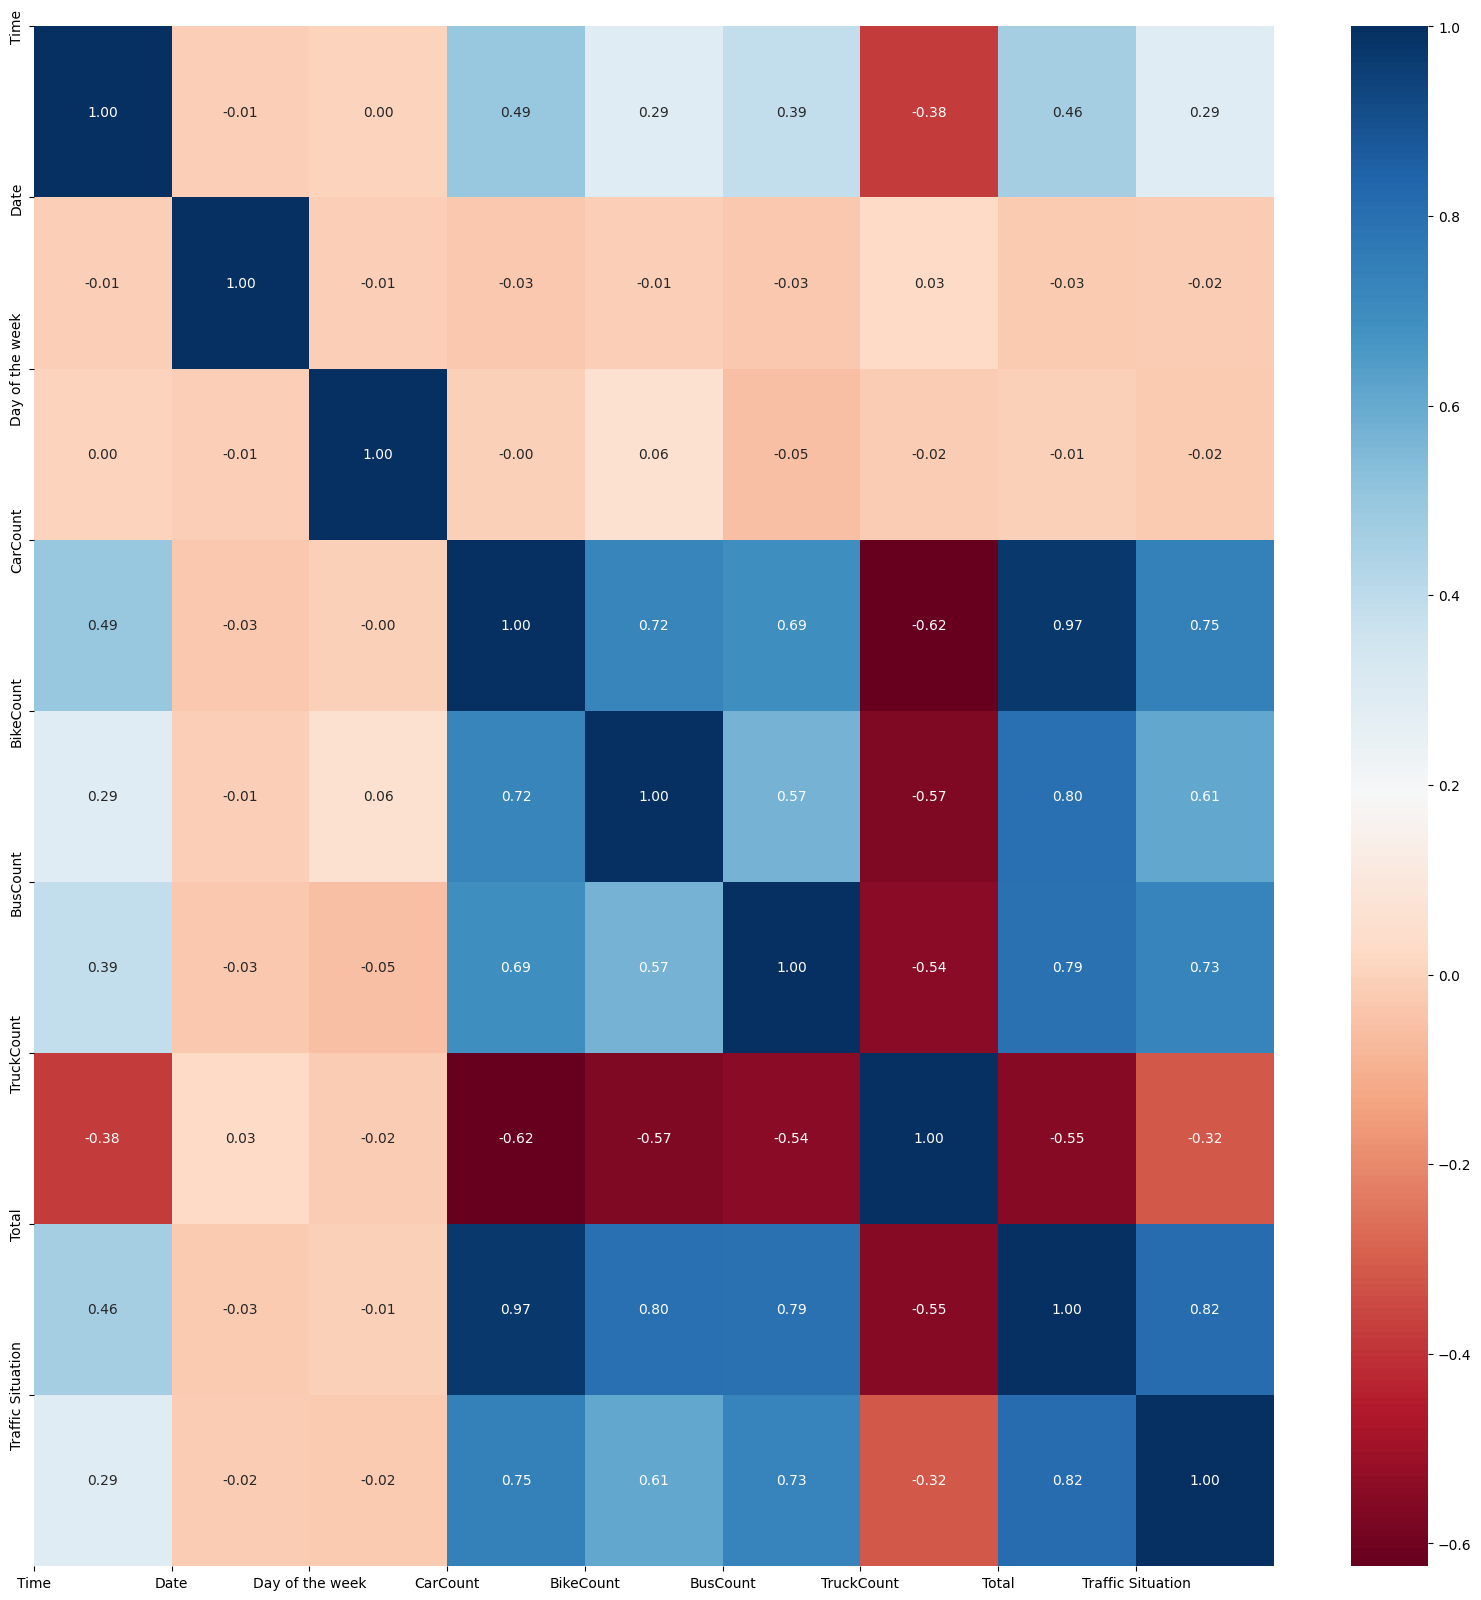

In [17]:
train_temp=train

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_temp['Time'] = le.fit_transform(train_temp['Time'])

corr = train_temp.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

XGBClassifie: 
 [1.8394163e-03 3.7277141e-04 1.7649922e-04 1.5505096e-02 7.1617216e-03
 1.6866037e-01 2.6005638e-01 5.4622775e-01]


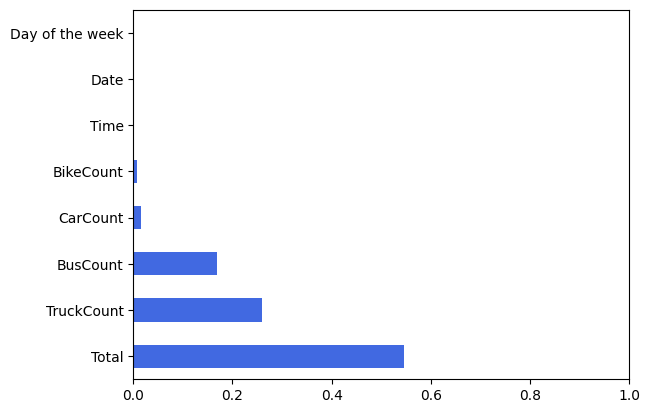

In [18]:
from xgboost import XGBClassifier
X_data_feature= train.drop(columns=['Traffic Situation'],axis=1)
y_data_feature= train['Traffic Situation']

model = [XGBClassifier()]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(10).plot(kind='barh', color='royalblue')
    plt.xlim(0, 1.0)
    plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 2678, number of used features: 8
[LightGBM] [Info] Start training from score -2.261614
[LightGBM] [Info] Start training from score -0.588310
[LightGBM] [Info] Start training from score -2.182399
[LightGBM] [Info] Start training from score -1.479367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

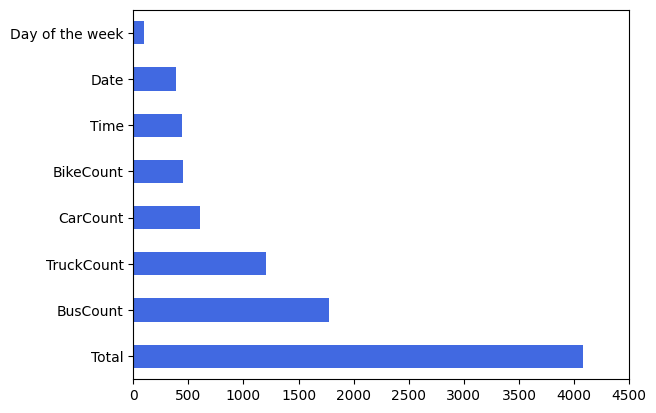

In [23]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import pandas as pd

model = [LGBMClassifier()]

model = [model[i].fit(X_data_feature, y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(10).plot(kind='barh', color='royalblue')
    plt.xlim(0, 4500)
    plt.show()


<catboost.co: 
 [ 1.46469851  0.43155772  0.31474545  1.92798683  0.63489931 17.78527162
 37.97612781 39.46471275]


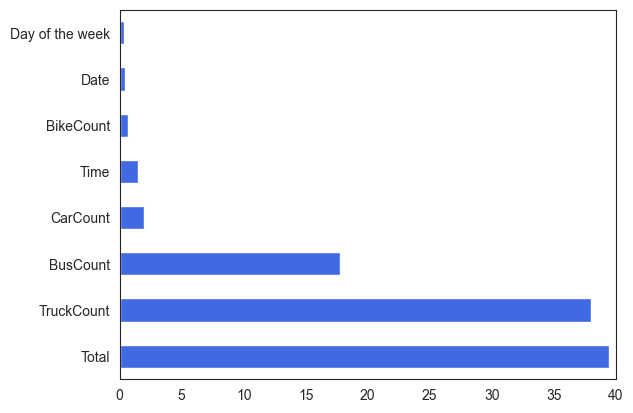

In [33]:
from catboost import CatBoostClassifier

model = [CatBoostClassifier(logging_level='Silent')]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(10).plot(kind='barh', color='royalblue')
    plt.xlim(0, 40)
    plt.show()

In [26]:
%pip install catboost



  Using cached catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached plotly-5.18.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
Using cached catboost-1.2.2-cp311-cp311-win_amd64.whl (101.0 MB)
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 217.9 kB/s eta 0:01:12
   ---------------------------------------- 0.0/15.6 MB 217.9 kB/s eta 0:01:12
   ---------------------------------------- 0.1/15.6 MB 273.8 kB/s eta 0:00:57
   ---------------------------------------- 0.1/15.6 MB 273.8 kB/s eta 0:00:57
   ------

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\mughe\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\catboost\\hnsw\\_hnsw.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\mughe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [27]:
train = train.drop(columns=["Day of the week","Date"],axis=1)
train

,Time,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
828,41,14,16,9,14,53,1
929,51,104,31,37,6,178,3
2170,37,91,22,34,8,155,2
2702,44,18,2,1,27,48,1
2676,89,105,14,13,32,164,2
...,...,...,...,...,...,...,...
1921,18,19,2,0,22,43,1
229,90,24,18,37,18,97,1
1835,38,19,2,1,12,34,0
2216,32,12,3,0,39,54,1


In [28]:
X= train.drop(columns=["Traffic Situation"],axis=1)
y= train["Traffic Situation"]

In [29]:
X_train=X
y_train=y

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5
0,-0.248684,-1.200271,0.082850,-0.442325,-0.123578,-1.023389
1,0.113949,0.767295,1.253470,1.510645,-0.877003,1.056847
2,-0.393737,0.483091,0.551098,1.301398,-0.688647,0.674083
3,-0.139894,-1.112824,-1.009729,-1.000316,1.100737,-1.106598
4,1.491955,0.789157,-0.073233,-0.163329,1.571628,0.823860
...,...,...,...,...,...,...
2673,-1.082740,-1.090962,-1.009729,-1.070065,0.629847,-1.189808
2674,1.528218,-0.981653,0.238932,1.510645,0.253134,-0.291146
2675,-0.357474,-1.090962,-1.009729,-1.000316,-0.311934,-1.339584
2676,-0.575054,-1.243995,-0.931688,-1.070065,2.230875,-1.006747


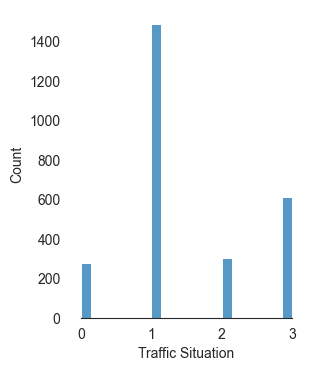

Skewness: 0.527934
Kurtosis: -0.860804


In [30]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(3, 4))
sns.histplot(y_train)
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (2142, 6)
Shape of X_eval:  (536, 6)
Shape of y_train:  (2142,)
Shape of y_eval (536,)


In [32]:
y_train =pd.DataFrame(y_train)
y_eval =pd.DataFrame(y_eval)

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     ----------------- ---------------------- 20.5/47.0 kB ? eta -:--:--
     --------------------------------- ---- 41.0/47.0 kB 330.3 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/47.0 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 181.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.0 MB 1.1 MB/s eta 0:01:37
   ---------------------------------------- 0.1/101.0 MB 1.1 MB/s eta 0:01:37
   ---------------------------------------- 0.1/101.0 MB 1.1 MB/s eta 0:01:37
   ---------------------------------------- 0.2/101.0 MB 958.4 kB/s eta 0:01:46
   ---------------------------------------- 0.2/101.0 MB 958.4 kB/s eta 0:01:46
   ---


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\mughe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


VotingClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier,BaggingClassifier
from sklearn.ensemble import  AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

In [35]:
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier()
clf2 = SGDClassifier()
clf3 = XGBClassifier()
clf4 = RandomForestClassifier()
clf5 = ExtraTreesClassifier()
clf6 = CatBoostClassifier(logging_level='Silent')
clf7 = KNeighborsClassifier()
clf8 = LogisticRegression()
clf9=  RidgeClassifier()
clf10= HistGradientBoostingClassifier()
clf11= BaggingClassifier()
clf12= GradientBoostingClassifier()
clf13= GaussianNB()
clf14= LGBMClassifier()
clf15= DummyClassifier()
clf16= SVC()

eclf = VotingClassifier(estimators=[('ADA', clf1), ('SGD', clf2), ('XGB', clf3), ('RF', clf4), ('ET', clf5), ('CAT', clf6), ('KN', clf7),
                                   ('LG', clf8), ('RC', clf9), ('HBC', clf10), ('BC', clf11), ('GBC', clf12), ('GNB', clf13), 
                                    ('LGBM', clf14),('DC', clf15),('SVC', clf16)],voting='hard')

for clf, label in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10,clf11,clf12,clf13,clf14,clf15,clf16], 
                      ['ADA', 'SGD','XGB','RF','ET','CAT','KN','LG','RC','HBC','BC','GBC','GNB','LGBM','DC','SVC']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.55 (+/- 0.00) [ADA]
Accuracy: 0.83 (+/- 0.02) [SGD]
Accuracy: 1.00 (+/- 0.00) [XGB]
Accuracy: 1.00 (+/- 0.00) [RF]
Accuracy: 0.98 (+/- 0.01) [ET]
Accuracy: 1.00 (+/- 0.00) [CAT]
Accuracy: 0.93 (+/- 0.01) [KN]
Accuracy: 0.90 (+/- 0.02) [LG]
Accuracy: 0.77 (+/- 0.01) [RC]
Accuracy: 1.00 (+/- 0.00) [HBC]
Accuracy: 1.00 (+/- 0.00) [BC]
Accuracy: 1.00 (+/- 0.00) [GBC]
Accuracy: 0.81 (+/- 0.02) [GNB]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 1713, number of used features: 6
[LightGBM] [Info] Start training from score -2.220255
[LightGBM] [Info] Start training from score -0.596935
[LightGBM] [Info] Start training from score -2.183311
[LightGBM] [Info] Start training from score -1.477294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [37]:
class StackingAveragedModels(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [38]:
stacked_averaged_models = StackingAveragedModels(base_models = (clf3,clf4,clf5,clf10,clf11,clf12,clf14),meta_model = clf6)

In [39]:
stacking_model=stacked_averaged_models.fit(X_train.values, y_train.values)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 1713, number of used features: 6
[LightGBM] [Info] Start training from score -2.209560
[LightGBM] [Info] Start training from score -0.580110
[LightGBM] [Info] Start training from score -2.198977
[LightGBM] [Info] Start training from score -1.516412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 1713, number of used features: 6
[LightGBM] [Info] Start training from score -2.209560
[LightGBM] [Info] Start training from score -0.580110
[LightGBM] [Info] Start training from score -2.198977
[LightGBM] [Info] Start training from score -1.516412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

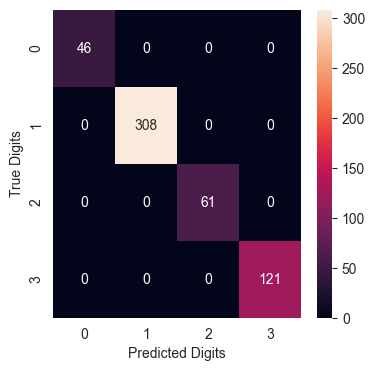

In [40]:
stacking_model.fit(X_train.values , y_train.values)
y_pred_stacking = stacking_model.predict(X_eval.values) 
stacking_acc = accuracy_score(y_eval.values, y_pred_stacking)
print("stacking accuracy is: {0:.3f}%".format(stacking_acc * 100))
cm = confusion_matrix(y_eval, y_pred_stacking)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

Predicted Test Data

In [41]:
test = test.reset_index(drop=True)
test_temp=test

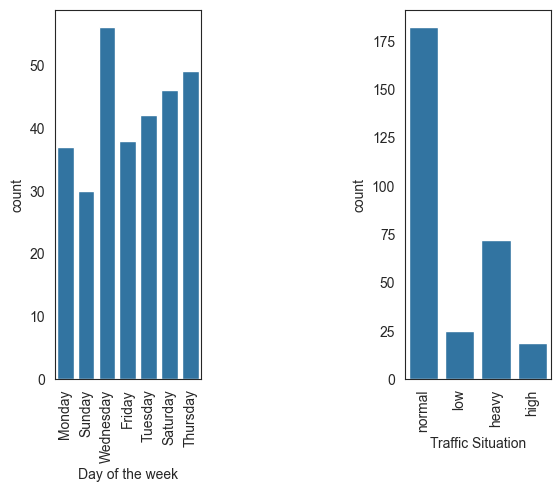

In [42]:
plt.subplot(1, 3, 1)
sns.countplot(x = test["Day of the week"])
plotter.xticks(rotation = 90);

plt.subplot(1, 3, 3)
sns.countplot(x = test["Traffic Situation"])
plotter.xticks(rotation = 90);
plt.show()

In [43]:
df_temp=test_temp
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
test_temp=df_temp
test_temp

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,10:30:00 PM,23,1,12,0,0,22,34,1
1,9:30:00 AM,15,7,64,12,27,8,111,1
2,12:30:00 AM,18,3,20,5,0,10,35,0
3,5:00:00 AM,13,5,58,13,4,15,90,1
4,1:15:00 PM,20,5,161,50,10,0,221,3
...,...,...,...,...,...,...,...,...,...
293,5:00:00 AM,20,5,70,6,7,14,97,1
294,10:00:00 PM,9,4,17,4,1,20,42,1
295,9:45:00 PM,21,7,82,16,14,34,146,2
296,6:00:00 PM,29,7,112,13,37,6,168,3


In [44]:
test_temp = test_temp.drop(columns=['Traffic Situation'],axis=1)
test_temp

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,10:30:00 PM,23,1,12,0,0,22,34
1,9:30:00 AM,15,7,64,12,27,8,111
2,12:30:00 AM,18,3,20,5,0,10,35
3,5:00:00 AM,13,5,58,13,4,15,90
4,1:15:00 PM,20,5,161,50,10,0,221
...,...,...,...,...,...,...,...,...
293,5:00:00 AM,20,5,70,6,7,14,97
294,10:00:00 PM,9,4,17,4,1,20,42
295,9:45:00 PM,21,7,82,16,14,34,146
296,6:00:00 PM,29,7,112,13,37,6,168


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_temp['Time'] = le.fit_transform(test_temp['Time'])
test_temp=test_temp.drop(columns=['Day of the week',"Date"],axis=1)
test_temp

,Time,CarCount,BikeCount,BusCount,TruckCount,Total
0,5,12,0,0,22,34
1,87,64,12,27,8,111
2,20,20,5,0,10,35
3,55,58,13,4,15,90
4,27,161,50,10,0,221
...,...,...,...,...,...,...
293,55,70,6,7,14,97
294,1,17,4,1,20,42
295,90,82,16,14,34,146
296,63,112,13,37,6,168


In [46]:
test_row = test_temp.shape[0]
test_row 

298

In [47]:
import_train = X.reset_index(drop=True)
import_train

,Time,CarCount,BikeCount,BusCount,TruckCount,Total
0,41,14,16,9,14,53
1,51,104,31,37,6,178
2,37,91,22,34,8,155
3,44,18,2,1,27,48
4,89,105,14,13,32,164
...,...,...,...,...,...,...
2673,18,19,2,0,22,43
2674,90,24,18,37,18,97
2675,38,19,2,1,12,34
2676,32,12,3,0,39,54


In [48]:
Row_Number=test_row 
X_test_target1_df=import_train._append(test_temp,ignore_index=True)

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
X_test_target1_df = StandardScaler.fit_transform(X_test_target1_df)
test_pred_target0= pd.DataFrame(X_test_target1_df)
test_pred_target0 = pd.DataFrame(test_pred_target0).tail(Row_Number)#tail:抓取後面資料
test_pred_target0 = test_pred_target0.reset_index(drop=True)
test_pred_target0

,0,1,2,3,4,5
0,-1.536183,-1.236756,-1.161302,-1.065552,0.629601,-1.332963
1,1.437268,-0.102449,-0.227112,0.817348,-0.690898,-0.053479
2,-0.992259,-1.062247,-0.772056,-1.065552,-0.502255,-1.316347
3,0.276897,-0.233331,-0.149263,-0.786604,-0.030648,-0.402429
4,-0.738428,2.013469,2.731155,-0.368182,-1.445469,1.774355
...,...,...,...,...,...,...
293,0.276897,0.028432,-0.694207,-0.577393,-0.124969,-0.286113
294,-1.681229,-1.127688,-0.849905,-0.995815,0.440959,-1.200030
295,1.546052,0.290195,0.084284,-0.089233,1.761458,0.528104
296,0.566989,0.944603,-0.149263,1.514719,-0.879540,0.893671


In [49]:
test_pred_target0.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [50]:
Stacking_predict=stacking_model.predict(test_pred_target0.values)

In [51]:
#DataFrame
Stacking_predict_df=pd.DataFrame(Stacking_predict)

#rename lable
Stacking_predict_df=Stacking_predict_df.set_axis(axis=1,labels=['Stack_pred'])

#merge predict
test_pred=test.merge(Stacking_predict_df,how='inner',left_index=True,right_index=True)
test_pred

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Stack_pred
0,10:30:00 PM,23,1,12,0,0,22,34,1,1
1,9:30:00 AM,15,7,64,12,27,8,111,1,1
2,12:30:00 AM,18,3,20,5,0,10,35,0,0
3,5:00:00 AM,13,5,58,13,4,15,90,1,1
4,1:15:00 PM,20,5,161,50,10,0,221,3,3
...,...,...,...,...,...,...,...,...,...,...
293,5:00:00 AM,20,5,70,6,7,14,97,1,1
294,10:00:00 PM,9,4,17,4,1,20,42,1,1
295,9:45:00 PM,21,7,82,16,14,34,146,2,2
296,6:00:00 PM,29,7,112,13,37,6,168,3,3


Accuracy

stacking accuracy is: 100.000%


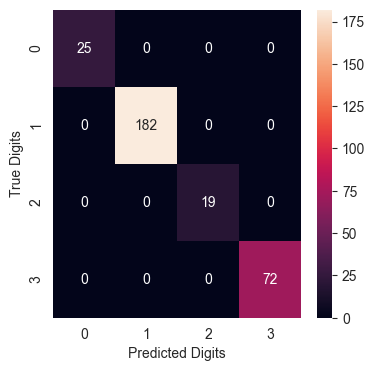

In [52]:
stacking_acc = accuracy_score(test_pred['Traffic Situation'], test_pred['Stack_pred'])
print("stacking accuracy is: {0:.3f}%".format(stacking_acc * 100))
cm = confusion_matrix(test_pred['Traffic Situation'], test_pred['Stack_pred'])
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()